In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('C://CAPSTONE//DataSets//Heart//CSV//HeartTrain.csv')
test = pd.read_csv('C://CAPSTONE//DataSets//Heart//CSV//HeartTest.csv')
train.head(5)

,Age,Sex,CPT,RBP,SC,FBS,RER,MHR,EIA,Oldpeak,SOP,NMV,thal,Result
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1


In [2]:
print(train.shape)
print(test.shape)

(239, 14)
(30, 14)


In [3]:
train.describe()

,Age,Sex,CPT,RBP,SC,FBS,RER,MHR,EIA,Oldpeak,SOP,NMV,thal,Result
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,54.179916,0.665272,3.171548,130.656904,248.079498,0.150628,1.029289,149.535565,0.343096,1.038494,1.589958,0.669456,4.740586,1.439331
std,9.179184,0.472886,0.970070,17.806602,51.942983,0.358436,0.997465,23.582454,0.475740,1.168181,0.614311,0.941318,1.948838,0.497347
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,47.000000,0.000000,3.000000,120.000000,212.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,54.000000,1.000000,3.000000,130.000000,243.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.500000,1.000000,1.800000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [4]:
# making training features and labels
train_labels = train['Result']
train_features = train.drop('Result',1)
train_features.head(5)

,Age,Sex,CPT,RBP,SC,FBS,RER,MHR,EIA,Oldpeak,SOP,NMV,thal
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7


In [5]:
from sklearn.neighbors import KNeighborsClassifier

#create KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_features, train_labels)

KNeighborsClassifier(metric='euclidean')

In [6]:
# making testing features and labels
test_labels = test['Result']
test_features = test.drop('Result',1)
test_features.head(5)

,Age,Sex,CPT,RBP,SC,FBS,RER,MHR,EIA,Oldpeak,SOP,NMV,thal
0,68,1,3,180,274,1,2,150,1,1.6,2,0,7
1,39,1,3,140,321,0,2,182,0,0.0,1,0,3
2,53,0,4,130,264,0,2,143,0,0.4,2,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,51,0,3,140,308,0,2,142,0,1.5,1,1,3


In [7]:
#use KNN's predict method to predict values
predictions = knn.predict(test_features)

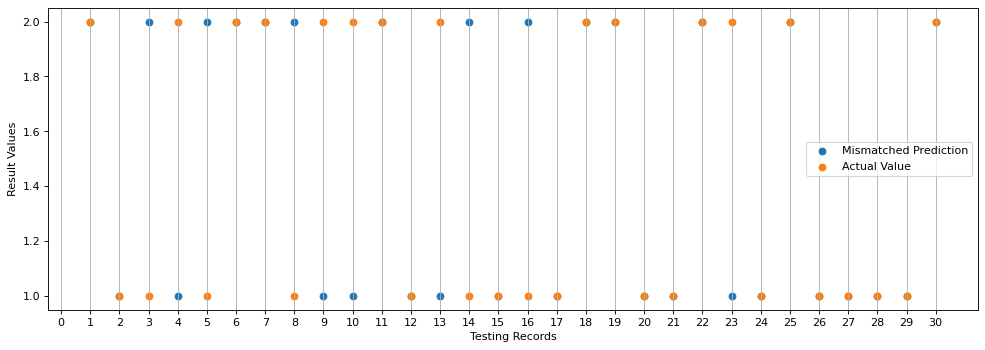

In [8]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ids = []
for i in range(1,31):
    ids.append(i)

#create line chart to show variations
plt.scatter(ids , predictions, label = 'Mismatched Prediction')
plt.scatter(ids , test_labels, label = 'Actual Value')
plt.xlabel('Testing Records')
plt.ylabel('Result Values')
plt.xticks(np.arange(0,31,1))
plt.legend()
plt.grid(axis = 'x')
plt.show()

In [9]:
import numpy as np

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.33 degrees.


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.0 %.


In [11]:
TN = 0
TP = 0
FN = 0
FP = 0
for key in range(0,30):
    if( test_labels[key] == 1):
        # Positive case
        if( predictions[key] == test_labels[key]):
            # True Positive
            TP = TP+1
        else:
            # False Positive
            FP = FP+1
    else:
        # Negative case
        if( predictions[key] == test_labels[key]):
            # True Negative
            TN = TN+1
        else:
            FN = FN+1

confusion_matrix = np.matrix([[TN , FP] ,
                    [FN , TP]])
print(confusion_matrix)

[[ 9  5]
 [ 5 11]]
